In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import findlay2025a as f25a

In [ ]:
c_sps, sp_exp_rates, sp_state_rates, sp_cond_rates = f25a.spindles.aggregate_spindles(
    region="cortical"
)

In [3]:
c_ds, ds_exp_rates, ds_state_rates, ds_cond_rates = (
    f25a.dentate_spikes.aggregate_dspks()
)

In [4]:
nbsh = f25a.core.get_project("seahorse")

In [5]:
colorblind_palette = sns.color_palette("colorblind")
state_colors = {
    "Wake": colorblind_palette[2],
    "NREM": colorblind_palette[0],
    "IS": colorblind_palette[3],
    "REM": colorblind_palette[1],
}

In [ ]:
from findlay2025a.constants import Experiments as Exps

experiment_display_names = {
    Exps.NOD: "Novelty",
    Exps.COW: "Locomotion",
    Exps.CTN: "Dual",
}

spindle_measure_display_names = {
    "rate_rel2total": "Cortical.Spindle.Rate",
}
ds_measure_display_names = {
    "rate_rel2total": "DSPK.Rate",
}

sp_state_rates = sp_state_rates.reset_index()
sp_state_rates = sp_state_rates[["subject", "experiment", "state", "rate_rel2total"]]
sp_state_rates["experiment"] = sp_state_rates["experiment"].map(
    experiment_display_names
)
sp_state_rates = sp_state_rates.rename(columns=spindle_measure_display_names)
sp_state_rates.to_parquet(nbsh.get_project_file("cortical_spindle_state_rates.parquet"))

ds_state_rates = ds_state_rates.reset_index()
ds_state_rates = ds_state_rates[["subject", "experiment", "state", "rate_rel2total"]]
ds_state_rates["experiment"] = ds_state_rates["experiment"].map(
    experiment_display_names
)
ds_state_rates = ds_state_rates.rename(columns=ds_measure_display_names)
ds_state_rates.to_parquet(nbsh.get_project_file("dspk_state_rates.parquet"))

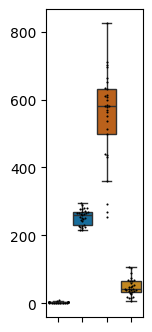

In [10]:
df = sp_state_rates
df["Cortical.Spindle.Rate"] = df["Cortical.Spindle.Rate"] * 100
fig, ax = plt.subplots(figsize=(1.25, 4))
sns.boxplot(
    data=df,
    y="Cortical.Spindle.Rate",
    x="state",
    order=list(state_colors.keys()),
    fliersize=0,
    linewidth=1.0,
    hue="state",
    hue_order=list(state_colors.keys()),
    palette=state_colors,
    ax=ax,
)
sns.swarmplot(
    data=df,
    y="Cortical.Spindle.Rate",
    x="state",
    color="black",
    s=1.5,
    order=list(state_colors.keys()),
    ax=ax,
)
ylim = ax.get_ylim()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
fig.savefig(
    nbsh.get_project_file("figures/cxsp_rate_rel2total_by_state.png"),
    bbox_inches="tight",
    dpi=300,
)

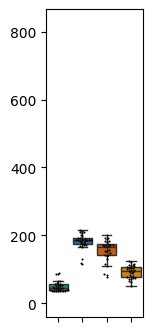

In [12]:
df = ds_state_rates
df["DSPK.Rate"] = df["DSPK.Rate"] * 100
fig, ax = plt.subplots(figsize=(1.25, 4))
sns.boxplot(
    data=df,
    y="DSPK.Rate",
    x="state",
    order=list(state_colors.keys()),
    fliersize=0,
    linewidth=1.0,
    hue="state",
    hue_order=list(state_colors.keys()),
    palette=state_colors,
    ax=ax,
)
sns.swarmplot(
    data=df,
    y="DSPK.Rate",
    x="state",
    color="black",
    s=1.5,
    order=list(state_colors.keys()),
    ax=ax,
)
ax.set_ylim(ylim)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
fig.savefig(
    nbsh.get_project_file("figures/dspk_rate_rel2total_by_state.png"),
    bbox_inches="tight",
    dpi=300,
)